In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
y = data.target

In [3]:
from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(n_splits=1, 
                  train_size=0.8, 
                  test_size=0.2, 
                  random_state=0)

train_index, test_index = next(ss.split(X, y))

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)

In [5]:
import time

In [6]:
from sklearn.svm import SVC

clf = SVC(kernel='linear')

In [7]:
clf.C = 1

st = time.time()
clf.fit(X_train, y_train)
print(1000 * (time.time() - st), "[ms]")

clf.score(X_test, y_test)

1.9979476928710938 [ms]


0.9649122807017544

In [8]:
clf.C = 1e20

st = time.time()
clf.fit(X_train, y_train)
print(1000 * (time.time() - st), "[ms]")

clf.score(X_test, y_test)

158.9987277984619 [ms]


0.956140350877193

In [9]:
from sklearn.model_selection import GridSearchCV

param = {'C': 10**np.arange(-15.0,21.0)}

gs = GridSearchCV(clf, param, verbose=1)
gs.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    3.0s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1e+20, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.e-15, 1.e-14, 1.e-13, 1.e-12, 1.e-11, 1.e-10, 1.e-09, 1.e-08,
       1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00,
       1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07, 1.e+08,
       1.e+09, 1.e+10, 1.e+11, 1.e+12, 1.e+13, 1.e+14, 1.e+15, 1.e+16,
       1.e+17, 1.e+18, 1.e+19, 1.e+20])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

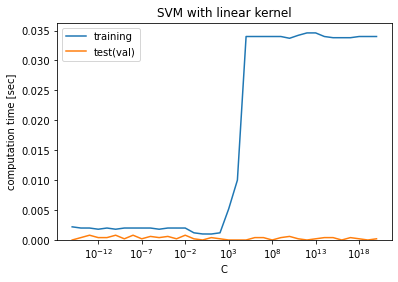

In [10]:
plt.plot(gs.cv_results_['param_C'].data, 
         gs.cv_results_['mean_fit_time'], 
         label="training")

plt.plot(gs.cv_results_['param_C'].data,
         gs.cv_results_['mean_score_time'], 
         label="test(val)")

plt.ylim(0,)
plt.xscale("log")
plt.xlabel("C")
plt.ylabel("computation time [sec]")
plt.legend(loc="best");
plt.title("SVM with linear kernel");

In [11]:
from sklearn.svm import LinearSVC

clf = LinearSVC()

In [12]:
clf.C = 1

st = time.time()
clf.fit(X_train, y_train)
print(1000 * (time.time() - st), "[ms]")

clf.score(X_test, y_test)

5.000591278076172 [ms]


0.9649122807017544

In [13]:
clf.C = 1e20

st = time.time()
clf.fit(X_train, y_train)
print(1000 * (time.time() - st), "[ms]")

clf.score(X_test, y_test)

7.997989654541016 [ms]


C:\ProgramData\Anaconda3\envs\AI\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9473684210526315

In [14]:
from sklearn.model_selection import GridSearchCV

param = {'C': 10**np.arange(-15.0,21.0)}

gs2 = GridSearchCV(clf, param, verbose=1)
gs2.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\ProgramData\Anaconda3\envs\AI\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\envs\AI\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\envs\AI\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\envs\AI\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\envs\AI\lib\site-packages\sklearn\svm\_bas

C:\ProgramData\Anaconda3\envs\AI\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\envs\AI\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\envs\AI\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\envs\AI\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\envs\AI\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number o

GridSearchCV(cv=None, error_score=nan,
             estimator=LinearSVC(C=1e+20, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.e-15, 1.e-14, 1.e-13, 1.e-12, 1.e-11, 1.e-10, 1.e-09, 1.e-08,
       1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00,
       1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07, 1.e+08,
       1.e+09, 1.e+10, 1.e+11, 1.e+12, 1.e+13, 1.e+14, 1.e+15, 1.e+16,
       1.e+17, 1.e+18, 1.e+19, 1.e+20])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

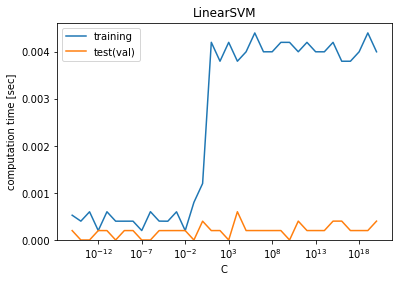

In [15]:
plt.plot(gs2.cv_results_['param_C'].data, 
         gs2.cv_results_['mean_fit_time'], 
         label="training")

plt.plot(gs2.cv_results_['param_C'].data,
         gs2.cv_results_['mean_score_time'], 
         label="test(val)")

plt.ylim(0,)
plt.xscale("log")
plt.xlabel("C")
plt.ylabel("computation time [sec]")
plt.legend(loc="best")
plt.title("LinearSVM");

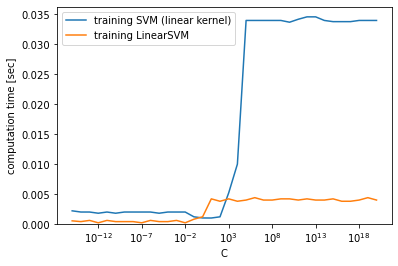

In [16]:
plt.plot(gs.cv_results_['param_C'].data, 
         gs.cv_results_['mean_fit_time'], 
         label="training SVM (linear kernel)")

plt.plot(gs2.cv_results_['param_C'].data, 
         gs2.cv_results_['mean_fit_time'], 
         label="training LinearSVM")

plt.ylim(0,)
plt.xscale("log")
plt.xlabel("C")
plt.ylabel("computation time [sec]")
plt.legend(loc="best");

In [17]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

estimators = [('scaler', MinMaxScaler()), 
              ('clf', LinearSVC())]

pipe = Pipeline(estimators)

In [18]:
from sklearn.model_selection import GridSearchCV

param = {'clf__C': 10**np.arange(-15.0,21.0)}

gs = GridSearchCV(pipe, param, verbose=1)
gs.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\ProgramData\Anaconda3\envs\AI\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\envs\AI\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\envs\AI\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\envs\AI\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\envs\AI\lib\site-packages\sklearn\svm\_bas

C:\ProgramData\Anaconda3\envs\AI\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\envs\AI\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\envs\AI\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\envs\AI\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\envs\AI\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number o

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        MinMaxScaler(copy=True,
                                                     feature_range=(0, 1))),
                                       ('clf',
                                        LinearSVC(C=1.0, class_weight=None,
                                                  dual=True, fit_intercept=True,
                                                  intercept_scaling=1,
                                                  loss='squared_hinge',
                                                  max_iter=1000,
                                                  multi_class='ovr',
                                                  penalty='l2',
                                                  random_state=None, tol=0.0001,
                                                  verbose=0))],
                                ver

KeyError: 'mean_train_score'

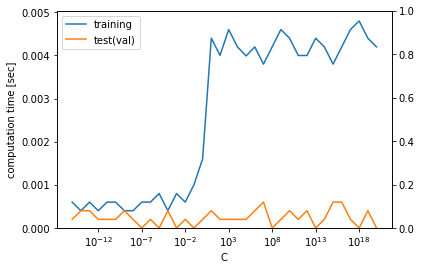

In [20]:
plt.plot(gs.cv_results_['param_clf__C'].data, 
         gs.cv_results_['mean_fit_time'], 
         label="training")

plt.plot(gs.cv_results_['param_clf__C'].data,
         gs.cv_results_['mean_score_time'], 
         label="test(val)")
plt.ylabel("computation time [sec]")
plt.ylim(0,)
plt.xscale("log")
plt.xlabel("C")
plt.legend(loc="upper left");

plt.twinx()

plt.plot(gs.cv_results_['param_clf__C'].data, 
         gs.cv_results_['mean_train_score'], 
         linestyle="--",
         label="training")

plt.plot(gs.cv_results_['param_clf__C'].data,
         gs.cv_results_['mean_test_score'], 
         linestyle="--",
         label="test(val)")
plt.ylabel("accuracy")
plt.legend(loc="lower right");

plt.title("LinearSVM")

In [21]:
from sklearn.preprocessing import MaxAbsScaler

estimators = [('scaler', MinMaxScaler()), 
              ('clf', SVC(kernel='linear'))]

pipe = Pipeline(estimators)

In [22]:
from sklearn.model_selection import GridSearchCV

param = {'clf__C': 10**np.arange(-15.0,21.0)}

gs = GridSearchCV(pipe, param, verbose=1)
gs.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    2.7s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        MinMaxScaler(copy=True,
                                                     feature_range=(0, 1))),
                                       ('clf',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='linear', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=True,
                                            tol=0.001, v...
             param_grid={'clf__C': array([1.e-15, 1.e-1

KeyError: 'mean_train_score'

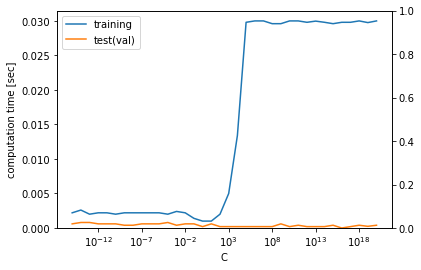

In [23]:
plt.plot(gs.cv_results_['param_clf__C'].data, 
         gs.cv_results_['mean_fit_time'], 
         label="training")

plt.plot(gs.cv_results_['param_clf__C'].data,
         gs.cv_results_['mean_score_time'], 
         label="test(val)")
plt.ylabel("computation time [sec]")
plt.ylim(0,)
plt.xscale("log")
plt.xlabel("C")
plt.legend(loc="upper left");

plt.twinx()

plt.plot(gs.cv_results_['param_clf__C'].data, 
         gs.cv_results_['mean_train_score'], 
         linestyle="--",
         label="training")

plt.plot(gs.cv_results_['param_clf__C'].data,
         gs.cv_results_['mean_test_score'], 
         linestyle="--",
         label="test(val)")
plt.ylabel("accuracy")
plt.legend(loc="lower right");

plt.title("SVM with linear kernel");

In [24]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

# MNISTの場合，60000が学習，10000がテスト，と決まっている
# http://yann.lecun.com/exdb/mnist/

X_train, X_test = mnist.data[:60000]/255., mnist.data[60000:]/255.
y_train, y_test = mnist.target[:60000], mnist.target[60000:]


ImportError: cannot import name 'fetch_mldata' from 'sklearn.datasets' (C:\ProgramData\Anaconda3\envs\AI\lib\site-packages\sklearn\datasets\__init__.py)

In [25]:
X_train.shape, X_test.shape

((455, 30), (114, 30))

In [26]:
clf = SVC(kernel='linear')

In [27]:
st = time.time()
clf.fit(X_train[::100], y_train[::100])
print(1000 * (time.time() - st), "[ms]")

1.0013580322265625 [ms]


In [28]:
for thin in [100, 50, 10, 5, 4]: # > 1 min...
    st = time.time()
    clf.fit(X_train[::thin], y_train[::thin])
    et = time.time() - st
    score = clf.score(X_test[::thin], y_test[::thin])
    print("{0:.2f} sec, size {1}, accuracy {2}".format(et, 
                                                       y_train[::thin].size,
                                                       score))

0.00 sec, size 5, accuracy 1.0
0.00 sec, size 10, accuracy 1.0
0.00 sec, size 46, accuracy 0.9166666666666666
0.00 sec, size 91, accuracy 1.0
0.00 sec, size 114, accuracy 0.9310344827586207


In [29]:
clf = LinearSVC() # dual

In [30]:
for thin in [100, 50, 10, 5, 4]:
    st = time.time()
    clf.fit(X_train[::thin], y_train[::thin])
    et = time.time() - st
    score = clf.score(X_test[::thin], y_test[::thin])
    print("{0:.2f} sec, size {1}, accuracy {2}".format(et, 
                                                       y_train[::thin].size,
                                                       score))

0.00 sec, size 5, accuracy 1.0
0.00 sec, size 10, accuracy 1.0
0.00 sec, size 46, accuracy 0.9166666666666666
0.00 sec, size 91, accuracy 1.0
0.00 sec, size 114, accuracy 0.9310344827586207


In [31]:
clf = LinearSVC(dual=False) # primal

In [32]:
for thin in [100, 50, 10, 5, 4]:
    st = time.time()
    clf.fit(X_train[::thin], y_train[::thin])
    et = time.time() - st
    score = clf.score(X_test[::thin], y_test[::thin])
    print("{0:.2f} sec, size {1}, accuracy {2}".format(et, 
                                                       y_train[::thin].size,
                                                       score))

0.03 sec, size 5, accuracy 1.0
0.00 sec, size 10, accuracy 1.0
0.00 sec, size 46, accuracy 0.9166666666666666
0.00 sec, size 91, accuracy 1.0
0.00 sec, size 114, accuracy 0.9310344827586207


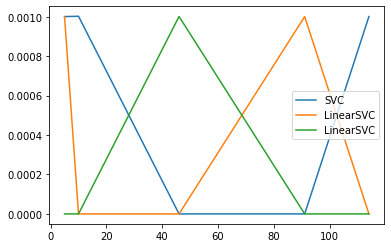

In [33]:
for clf in [SVC(kernel='linear'), 
            LinearSVC(), 
            LinearSVC(dual=False)]:
    times = []
    sizes = []
    for thin in [100, 50, 10, 5, 4]:
        st = time.time()
        clf.fit(X_train[::thin], y_train[::thin])
        times.append(time.time() - st)
        sizes.append(y_train[::thin].size)
    plt.plot(sizes, times, label=clf.__class__.__name__)

plt.legend(loc="best")
plt.show()

In [34]:
estimators = [('scaler', MinMaxScaler()), 
              ('clf', LinearSVC(dual=False))]

pipe = Pipeline(estimators)

param = {'clf__C': 10**np.arange(-5.0,10.0)}

gs = GridSearchCV(pipe, param, n_jobs=-1, verbose=2)
gs.fit(X_train, y_train) # about 30min...

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    0.8s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        MinMaxScaler(copy=True,
                                                     feature_range=(0, 1))),
                                       ('clf',
                                        LinearSVC(C=1.0, class_weight=None,
                                                  dual=False,
                                                  fit_intercept=True,
                                                  intercept_scaling=1,
                                                  loss='squared_hinge',
                                                  max_iter=1000,
                                                  multi_class='ovr',
                                                  penalty='l2',
                                                  random_state=None, tol=0.0001,
                                                

In [35]:
estimators = [('scaler', MinMaxScaler()), 
              ('clf', LinearSVC(dual=True))]

pipe = Pipeline(estimators)

param = {'clf__C': 10**np.arange(-5.0,10.0)}

gs = GridSearchCV(pipe, param, n_jobs=-1, verbose=2)
gs.fit(X_train, y_train) # 1 hour ?

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  52 out of  75 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    0.0s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        MinMaxScaler(copy=True,
                                                     feature_range=(0, 1))),
                                       ('clf',
                                        LinearSVC(C=1.0, class_weight=None,
                                                  dual=True, fit_intercept=True,
                                                  intercept_scaling=1,
                                                  loss='squared_hinge',
                                                  max_iter=1000,
                                                  multi_class='ovr',
                                                  penalty='l2',
                                                  random_state=None, tol=0.0001,
                                                  verbose=0))],
                                ver

In [36]:
estimators = [('scaler', MinMaxScaler()), 
              ('clf', SVC(kernel='linear'))]

pipe = Pipeline(estimators)

param = {'clf__C': 10**np.arange(-5.0,10.0)}

gs = GridSearchCV(pipe, param, n_jobs=-1, verbose=2)
gs.fit(X_train, y_train) # 2 hours ?

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s


Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    0.1s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        MinMaxScaler(copy=True,
                                                     feature_range=(0, 1))),
                                       ('clf',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='linear', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=True,
                                            tol=0.001, verbose=False))],
                                verbose=Fa